In [22]:
import pandas as pd
import os
import numpy as np

In [23]:
org_heats_dir = ""
interested_file = "obj_dump_real_heat_all.txt"
org_heats_file = os.path.join(org_heats_dir, interested_file)
# columns = ["timestamp", "addr", "hotness"]
columns = ["timestamp", "addr", "diff0", "diff1",
           "diff2", "diff3", "diff4", "diff5", "diff6", "eye_observed", "real_temp"]
org_df = pd.read_csv(org_heats_file, sep="\t", header=None, names=columns)
print(org_df.dtypes)

timestamp       float64
addr              int64
diff0             int64
diff1             int64
diff2             int64
diff3             int64
diff4             int64
diff5             int64
diff6             int64
eye_observed      int64
real_temp       float64
dtype: object


In [24]:
diff_columns = ['diff0', 'diff1', 'diff2', 'diff3', 'diff4', 'diff5', 'diff6']
org_df['average'] = org_df[diff_columns].mean(axis=1)
org_df['std_dev'] = org_df[diff_columns].std(axis=1)
org_df['non_zeros'] = (org_df[diff_columns] != 0).sum(axis=1)
org_df['small_change_num'] = (org_df[diff_columns] < 127).sum(axis=1)
print(org_df)

           timestamp             addr  diff0  diff1  diff2  diff3  diff4  \
0           0.000000  140736791527472      0      2      3      3      3   
1           0.000000  140736791527504      0      3      3      2      3   
2           0.000000  140736791527536      0      3      3      2      3   
3           0.000000  140736791527568      0      3      2      3      3   
4           0.000000  140736791527600      0      3      2      3      3   
...              ...              ...    ...    ...    ...    ...    ...   
26289755  129.677944  140736835352848      0      0      0      0    127   
26289756  129.677944  140736835354000      0      0      0      0      0   
26289757  129.677944  140736835741520      3      3      3      2      3   
26289758  129.677944  140736838571008    127    127    127    127    127   
26289759  129.677944  140736838574592    127    127    127    127    127   

          diff5  diff6  eye_observed  real_temp     average    std_dev  \
0            

In [25]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = org_df[['average', 'std_dev', 'non_zeros', 'small_change_num']]
y = org_df['real_temp']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
# Assuming X_train, X_test, y_train, y_test have already been defined
# linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions for both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE and R² for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate MSE and R² for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output results for both training and testing sets
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Training Mean Squared Error (MSE): {train_mse}")
print(f"Training R-squared (R²): {train_r2}")
print(f"Testing Mean Squared Error (MSE): {test_mse}")
print(f"Testing R-squared (R²): {test_r2}")

pearson_corr, _ = pearsonr(y_test, y_test_pred)
print(f"Pearson correlation coefficient: {pearson_corr:.3f}")

Coefficients: [-0.09869469 -0.05838557  0.78084795 -0.68946689]
Intercept: 9.281685168308186
Training Mean Squared Error (MSE): 0.6722130345712521
Training R-squared (R²): 0.7329454954677155
Testing Mean Squared Error (MSE): 0.6726924819182796
Testing R-squared (R²): 0.7332766633774855


In [37]:
combined_predictions = np.concatenate([y_train_pred, y_test_pred])
# df_combined = pd.concat([X_train, X_test], ignore_index=True)  # Combine X_train and X_test
org_df['inferred'] = combined_predictions
print(org_df)

           timestamp             addr  diff0  diff1  diff2  diff3  diff4  \
0           0.000000  140736791527472      0      2      3      3      3   
1           0.000000  140736791527504      0      3      3      2      3   
2           0.000000  140736791527536      0      3      3      2      3   
3           0.000000  140736791527568      0      3      2      3      3   
4           0.000000  140736791527600      0      3      2      3      3   
...              ...              ...    ...    ...    ...    ...    ...   
26289755  129.677944  140736835352848      0      0      0      0    127   
26289756  129.677944  140736835354000      0      0      0      0      0   
26289757  129.677944  140736835741520      3      3      3      2      3   
26289758  129.677944  140736838571008    127    127    127    127    127   
26289759  129.677944  140736838574592    127    127    127    127    127   

          diff5  diff6  eye_observed  real_temp     average    std_dev  \
0            

In [39]:
inferred_file = "obj_dump_real_heat_all_inferred.txt"
org_df[['real_temp', 'inferred']].to_csv(
    inferred_file, sep='\t', index=False, header=False)

In [32]:
import random

# Generate the first list with 10,000 elements, each ranging from 0 to 20
list1 = [random.randint(0, 20) for _ in range(10000)]

# Generate the second list with each element varying within a 20% range of the corresponding element in list1
list2 = []
for value in list1:
    # Calculate the 20% range
    lower_bound = int(value * 0.75)  # 80% of the original value
    upper_bound = int(value * 1.3)  # 120% of the original value
    # lower_bound = int(value - 5)
    # upper_bound = int(value + 5)
    # Ensure the upper bound doesn't exceed 20 (since list1's elements are between 0 and 20)
    # upper_bound = min(upper_bound, 20)
    # Ensure the lower bound is not below 0
    lower_bound = max(lower_bound, 0)
    # Randomly choose a value within the range
    new_value = random.randint(lower_bound, upper_bound)
    list2.append(new_value)

# list1 = list1[:100]
# list2 = list2[:100]
# Print first 10 elements of both lists for comparison
print("List1 (first 10 elements):", list1[:10])
print("List2 (first 10 elements):", list2[:10])

List1 (first 10 elements): [2, 3, 10, 5, 19, 19, 17, 0, 4, 13]
List2 (first 10 elements): [2, 3, 12, 5, 19, 24, 18, 0, 5, 13]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


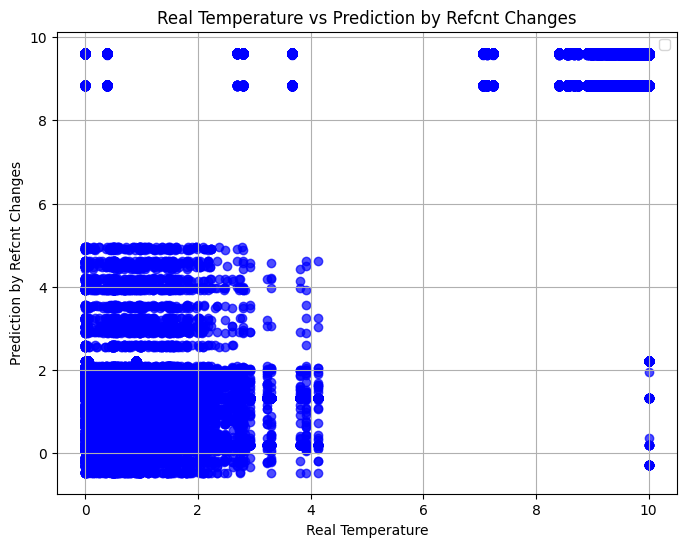

Pearson correlation coefficient: 0.86


In [34]:
# generate a scatter plot comparing ground truth real_temp and the predicted ones
import matplotlib.pyplot as plt

# Calculate Pearson correlation coefficient
# pearson_corr, _ = pearsonr(list1, list2)
# pearson_corr, _ = pearsonr(y_train, y_train_pred)
pearson_corr, _ = pearsonr(y_test, y_test_pred)
print(f"Pearson correlation coefficient: {pearson_corr:.3f}")
# Generate scatter plot of ground truth vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='b')


plt.title(
    f'Real Temperature vs Prediction by Refcnt Changes')
plt.xlabel('Real Temperature')
plt.ylabel('Prediction by Refcnt Changes')
plt.grid(True)
# plt.legend(loc='best')
plt.show()

# Output Pearson correlation coefficient


In [40]:
# use RFE to select a subset of features
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)

print(f"Selected Features: {rfe.support_}")
print(f"Feature Ranking: {rfe.ranking_}")

X_train_rfe = rfe.transform(X_train)  # Transform the training data
X_test_rfe = rfe.transform(X_test)    # Transform the testing data

model.fit(X_train_rfe, y_train)  # Train the model on selected features
y_pred_train = model.predict(X_train_rfe)  # Predictions on training data
y_pred_test = model.predict(X_test_rfe)    # Predictions on test data

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Output results
print(f"Training MSE: {train_mse}")
print(f"Training R-squared (R²): {train_r2}")
print(f"Test MSE: {test_mse}")
print(f"Test R-squared (R²): {test_r2}")

pearson_corr, _ = pearsonr(y_test, y_pred_test)
print(f"Pearson correlation coefficient: {pearson_corr:.3f}")

Selected Features: [ True False  True  True]
Feature Ranking: [1 2 1 1]
Training MSE: 0.6850449197520635
Training R-squared (R²): 0.7278476878339162
Test MSE: 0.6854715086351425
Test R-squared (R²): 0.7282097647033838
Pearson correlation coefficient: 0.853


In [41]:
# polynomial regression
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 5: Make predictions
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Step 6: Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

print(f"Training MSE: {train_mse}")
print(f"Training R-squared (R²): {train_r2}")
print(f"Test MSE: {test_mse}")
print(f"Test R-squared (R²): {test_r2}")

pearson_corr, _ = pearsonr(y_test, y_pred_test)
print(f"Pearson correlation coefficient: {pearson_corr:.3f}")

# plt.scatter(X['average'], y, color='blue', label='Data points')
# plt.scatter(X_train['average'], y_pred_train, color='red',
#             label='Polynomial Regression (Train)')
# plt.scatter(X_test['average'], y_pred_test, color='green',
#             label='Polynomial Regression (Test)')
# plt.title(f"Polynomial Regression (Degree {degree})")
# plt.xlabel('average of refcnt changes')
# plt.ylabel('Real Heat')
# plt.legend()
# plt.show()

Coefficients: [ 0.00000000e+00  3.26168438e+01 -3.10154177e-01 -2.95795944e+01
  5.97789448e+02 -1.13050882e-01  3.91056748e-03  1.49856870e-01
 -4.71804167e+00  1.45689520e-02 -1.88128724e-02  6.18491075e-02
 -3.26565913e-01  4.78340317e+00 -3.99974609e+01]
Intercept: -2227.2824784976006
Training MSE: 0.6484848880583071
Training R-squared (R²): 0.7423721326862658
Test MSE: 0.6490478612201122
Test R-squared (R²): 0.7426517824628139
Pearson correlation coefficient: 0.862


In [42]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=100, random_state=42)  # 100 trees in the forest
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Step 6: Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Output results
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R-squared (R²): {train_r2}")
print(f"Test R-squared (R²): {test_r2}")
pearson_corr, _ = pearsonr(y_test, y_pred_test)
print(f"Pearson correlation coefficient: {pearson_corr:.3f}")

Training MSE: 0.6484812503861127
Test MSE: 0.6490494371609129
Training R-squared (R²): 0.7423735778482836
Test R-squared (R²): 0.7426511576004883
Pearson correlation coefficient: 0.862
